# Implementing a Neural Net from Scratch using Theano

In [1]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib
import matplotlib.pyplot as plt
rng = np.random
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generate a Dataset

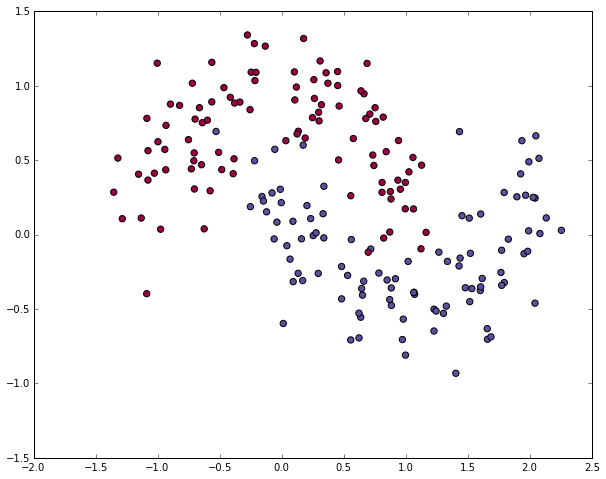

In [2]:
# Generate a dataset and plot it
from sklearn.datasets import make_moons
np.random.seed(0)
data_X, data_y = make_moons(200, noise=0.20)
plt.scatter(data_X[:,0], data_X[:,1], s=40, c=data_y, cmap=plt.cm.Spectral)

## Implement a logistic regression in Theano

In [26]:
# Initialize variables
N = data_X.shape[0]
feats = data_X.shape[1]
training_steps = 10000

# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")
W = theano.shared(rng.randn(feats), name="W")
b = theano.shared(0., name="b")

# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, W) - b))       # Probability that target = 1
prediction = p_1 > 0.5                        # The prediction thresholded
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # Cross-entropy loss function
cost = xent.mean() + 0.01 * (w ** 2).sum()    # The cost to minimize
gW, gb = T.grad(cost, [W, b])                 # Compute the gradient of the cost
                                              # (we shall return to this in a
                                              # following section of this tutorial)

# Compile
train = theano.function(inputs = [x,y],
                        outputs = [prediction, xent],
                        updates = ((W, W - 0.1 * gW), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs = prediction)

## Training the logistic regression

In [27]:
# Train
for i in range(training_steps):
    pred, err = train(data_X, data_y)
    if i%1000==0:
        print 'Iteration: {}'.format(i)
        print 'First 10 predictions: {}'.format(pred[:10])
        print 'Average Error: {}'.format(err.mean())
    

print("Final model:")
print(w.get_value())
print(b.get_value())

Iteration: 0
First 10 predictions: [0 0 1 1 0 0 0 0 0 0]
Average Error: 1.31809297417
Iteration: 1000
First 10 predictions: [0 1 0 1 1 1 1 1 1 1]
Average Error: 0.305450864328
Iteration: 2000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.300110997353
Iteration: 3000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.299474267633
Iteration: 4000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.2993766619
Iteration: 5000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.299360362149
Iteration: 6000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.29935754819
Iteration: 7000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.299357055778
Iteration: 8000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.299356969127
Iteration: 9000
First 10 predictions: [0 1 0 1 1 1 1 1 0 1]
Average Error: 0.299356953843
Final model:
[ 337.91634372 -291.61640391]
0.672711743855


## Prediction and evaluation

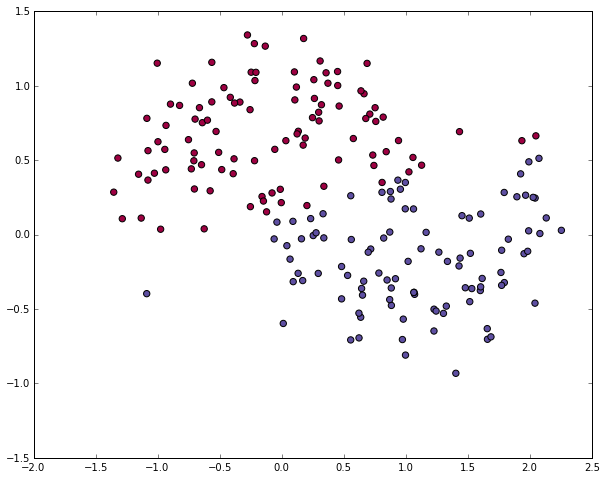

In [28]:
# Predict
pred_y = predict(data_X)

# Plot predictions
plt.scatter(data_X[:,0], data_X[:,1], s=40, c=pred_y, cmap=plt.cm.Spectral)

## Implementing a neural network

In [29]:
# Initialize variables
N = data_X.shape[0]
feats = data_X.shape[1]
training_steps = 10000

# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")
#w1 = theano.shared(rng.randn(feats), name="w1")
#b1 = theano.shared(0., name="b1"))

In [49]:
nn_input_dim = 2
nn_hdim = 5
nn_output_dim = 1

W1 = theano.shared(np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim), name="W1")
B1 = theano.shared(np.zeros(nn_hdim), name="B1")
W2 = theano.shared(np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim), name="W2")
B2 = theano.shared(np.zeros(nn_output_dim), name="B2")

In [67]:
# Construct Theano expression graph
l1_out = 1 / (1 + T.exp(-T.dot(x, W1) - B1))     # Probability that target = 1
l2_out = 1 / (1 + T.exp(-T.dot(l1_out, W2) - B2))     # Probability that target = 1
prediction = l2_out > 0.5                        # The prediction thresholded
xent = -y * T.log(l2_out) - (1-y) * T.log(1-l2_out) # Cross-entropy loss function
cost = xent.mean()    # The cost to minimize
gW1, gB1, gW2, gB2 = T.grad(cost, [W1, B1, W2, B2])                 # Compute the gradient of the cost
                                              # (we shall return to this in a
                                              # following section of this tutorial)

In [ ]:
# Compile
train = theano.function(inputs = [x,y],
                        outputs = [prediction, xent],
                        updates = ((W1, W1 - 0.1 * gW1), (B1, B1 - 0.1 * gB1), 
                                   (W2, W2 - 0.1 * gW2), (B2, B2 - 0.1 * gB2)))

In [70]:
predict = theano.function(inputs=[x], outputs = prediction)

In [85]:
data_X[:10].shape

(10, 2)

In [78]:
W1.get_value().shape

(2, 5)

In [86]:
data_X[:10].T*(W1.get_value())

ValueError: operands could not be broadcast together with shapes (2,10) (2,5) 

In [84]:
data_X[:5].dot(W1.get_value())

array([[-0.4480428 , -0.79414959, -0.63788024,  0.02745741,  0.16550811],
       [ 0.23780453, -2.44508206, -1.59939685, -0.86874598, -2.11005178],
       [-0.16758363,  0.31320741,  0.17396887,  0.19210866,  0.49239867],
       [ 0.44591839,  1.27763278,  0.96426081,  0.11786092,  0.1790015 ],
       [-0.05755094, -2.43834065, -1.66141607, -0.69264279, -1.6268836 ]])

## Train the neural net

In [71]:
# Train
for i in range(training_steps):
    pred, err = train(data_X, data_y)
    if i%1000==0:
        print 'Iteration: {}'.format(i)
        print 'First 10 predictions: {}'.format(pred[:10])
        print 'Average Error: {}'.format(err.mean())
    

print("Final model:")
print(w.get_value())
print(b.get_value())

ValueError: Shape mismatch: x has 200 rows but z has 1 rows
Apply node that caused the error: Gemm{no_inplace}(B2, TensorConstant{-1.0}, Elemwise{Composite{scalar_sigmoid((-i0))}}.0, W2, TensorConstant{-1.0})
Inputs types: [TensorType(float64, matrix), TensorType(float64, scalar), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, scalar)]
Inputs shapes: [(1, 1), (), (200, 5), (5, 1), ()]
Inputs strides: [(8, 8), (), (40, 8), (8, 8), ()]
Inputs values: [array([[ 0.]]), array(-1.0), 'not shown', array([[-0.29121518],
       [ 0.15087237],
       [-0.72653513],
       [-0.12905159],
       [-0.15861773]]), array(-1.0)]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.